# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [335]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [336]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [337]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# Command to tell Python to actually display the graphs
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style("whitegrid")

In [338]:
# Write your code here to read the data
fhOrder = pd.read_csv("foodhub_order.csv")

In [339]:
# Write your code here to view the first 5 rows
fhOrder.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [340]:
# Write your code here
fhOrder.shape

(1898, 9)

#### Observations:
The data has 1898 rows and 9 columns. 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [341]:
# Write your code here
print(fhOrder.info())
print('Unique Ratings: ', fhOrder['rating'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None
Unique Ratings:  ['Not given' '5' '3' '4']


#### Observations:
1. There are no null values in the data and all the data types seem approprate to their identified colummn header. 
2. There are 3 data types in the data: float64(1), int64(4), object(4)
3. Rating is an object, I would expect this to be a numaric value.  

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [342]:
# Write your code here
print('Unique Ratings: ', fhOrder['rating'].unique())
# Create subsets
fhOrder['rating'] = fhOrder['rating'].replace('Not given', np.nan).astype(float)
fhOrder['is_rated'] = fhOrder['rating'].notna()

# Show orders missing ratings with %
missing_values = fhOrder.isnull().sum()
missing_percentage = (missing_values / len(fhOrder)) * 100
missing_data = pd.DataFrame({'missing_count': missing_values, 'missing_percentage': missing_percentage})
print("Summary of incompatable data")
print(missing_data)



Unique Ratings:  ['Not given' '5' '3' '4']
Summary of incompatable data
                       missing_count  missing_percentage
order_id                           0                0.00
customer_id                        0                0.00
restaurant_name                    0                0.00
cuisine_type                       0                0.00
cost_of_the_order                  0                0.00
day_of_the_week                    0                0.00
rating                           736               38.78
food_preparation_time              0                0.00
delivery_time                      0                0.00
is_rated                           0                0.00


#### Observations:
1. There were 736 'Not given' values in the rating column that have been converted to nan (not a number) type. 
2. The **day_of_the_week** column only contains 2 unique values, weekend and weekday, the column title could be misleading. 

* I have seperated the data into three subsets:

	1.	Orders with Ratings: Contains 1162 entries with numeric ratings.
	2.	Orders without Ratings: Contains 736 entries where the rating column is now empty.
	3.  All data inclusive of the null rating. 



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

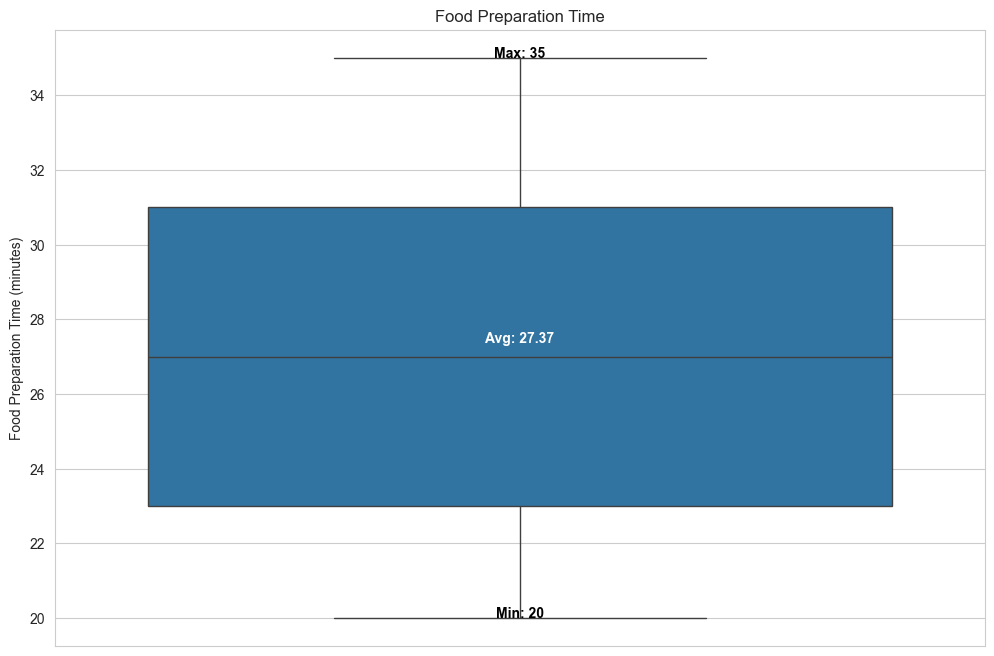

In [343]:
# Write your code here
# set vars
fhOrder_min = fhOrder['food_preparation_time'].min()
fhOrder_max = fhOrder['food_preparation_time'].max()
fhOrder_mean = fhOrder['food_preparation_time'].mean()

# boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(y='food_preparation_time', data=fhOrder)
plt.title('Food Preparation Time')
plt.ylabel('Food Preparation Time (minutes)')

# Style boxplot text
plt.text(0, fhOrder_min, f"Min: {fhOrder_min}", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.text(0, fhOrder_max, f"Max: {fhOrder_max}", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.text(0, fhOrder_mean, f"Avg: {fhOrder_mean:.2f}", horizontalalignment='center', size='medium', color='white', weight='semibold')
plt.show()

#### Observations:
##### Food Preparation Time
* Minimum Time: 20 minutes
* Average Time: 27.37 minutes
* Maximum Time: 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

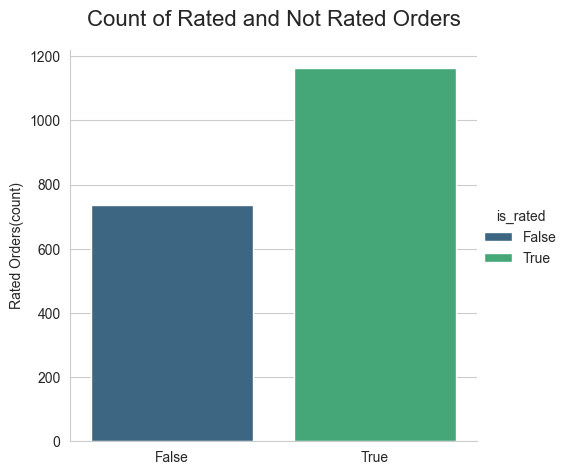

In [344]:
# # Write the code here
# catplot
rated_counts = fhOrder.groupby(['is_rated']).size().reset_index(name='count')
graph = sns.catplot(x='is_rated', y='count', hue='is_rated', data=rated_counts, kind='bar', palette='viridis')
plt.ylabel('Rated Orders(count)')
plt.xlabel('')
graph.figure.subplots_adjust(top=0.9)
graph.figure.suptitle('Count of Rated and Not Rated Orders', fontsize=16)

plt.show()

#### Observations:
There are **736** unrated orders in the data.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

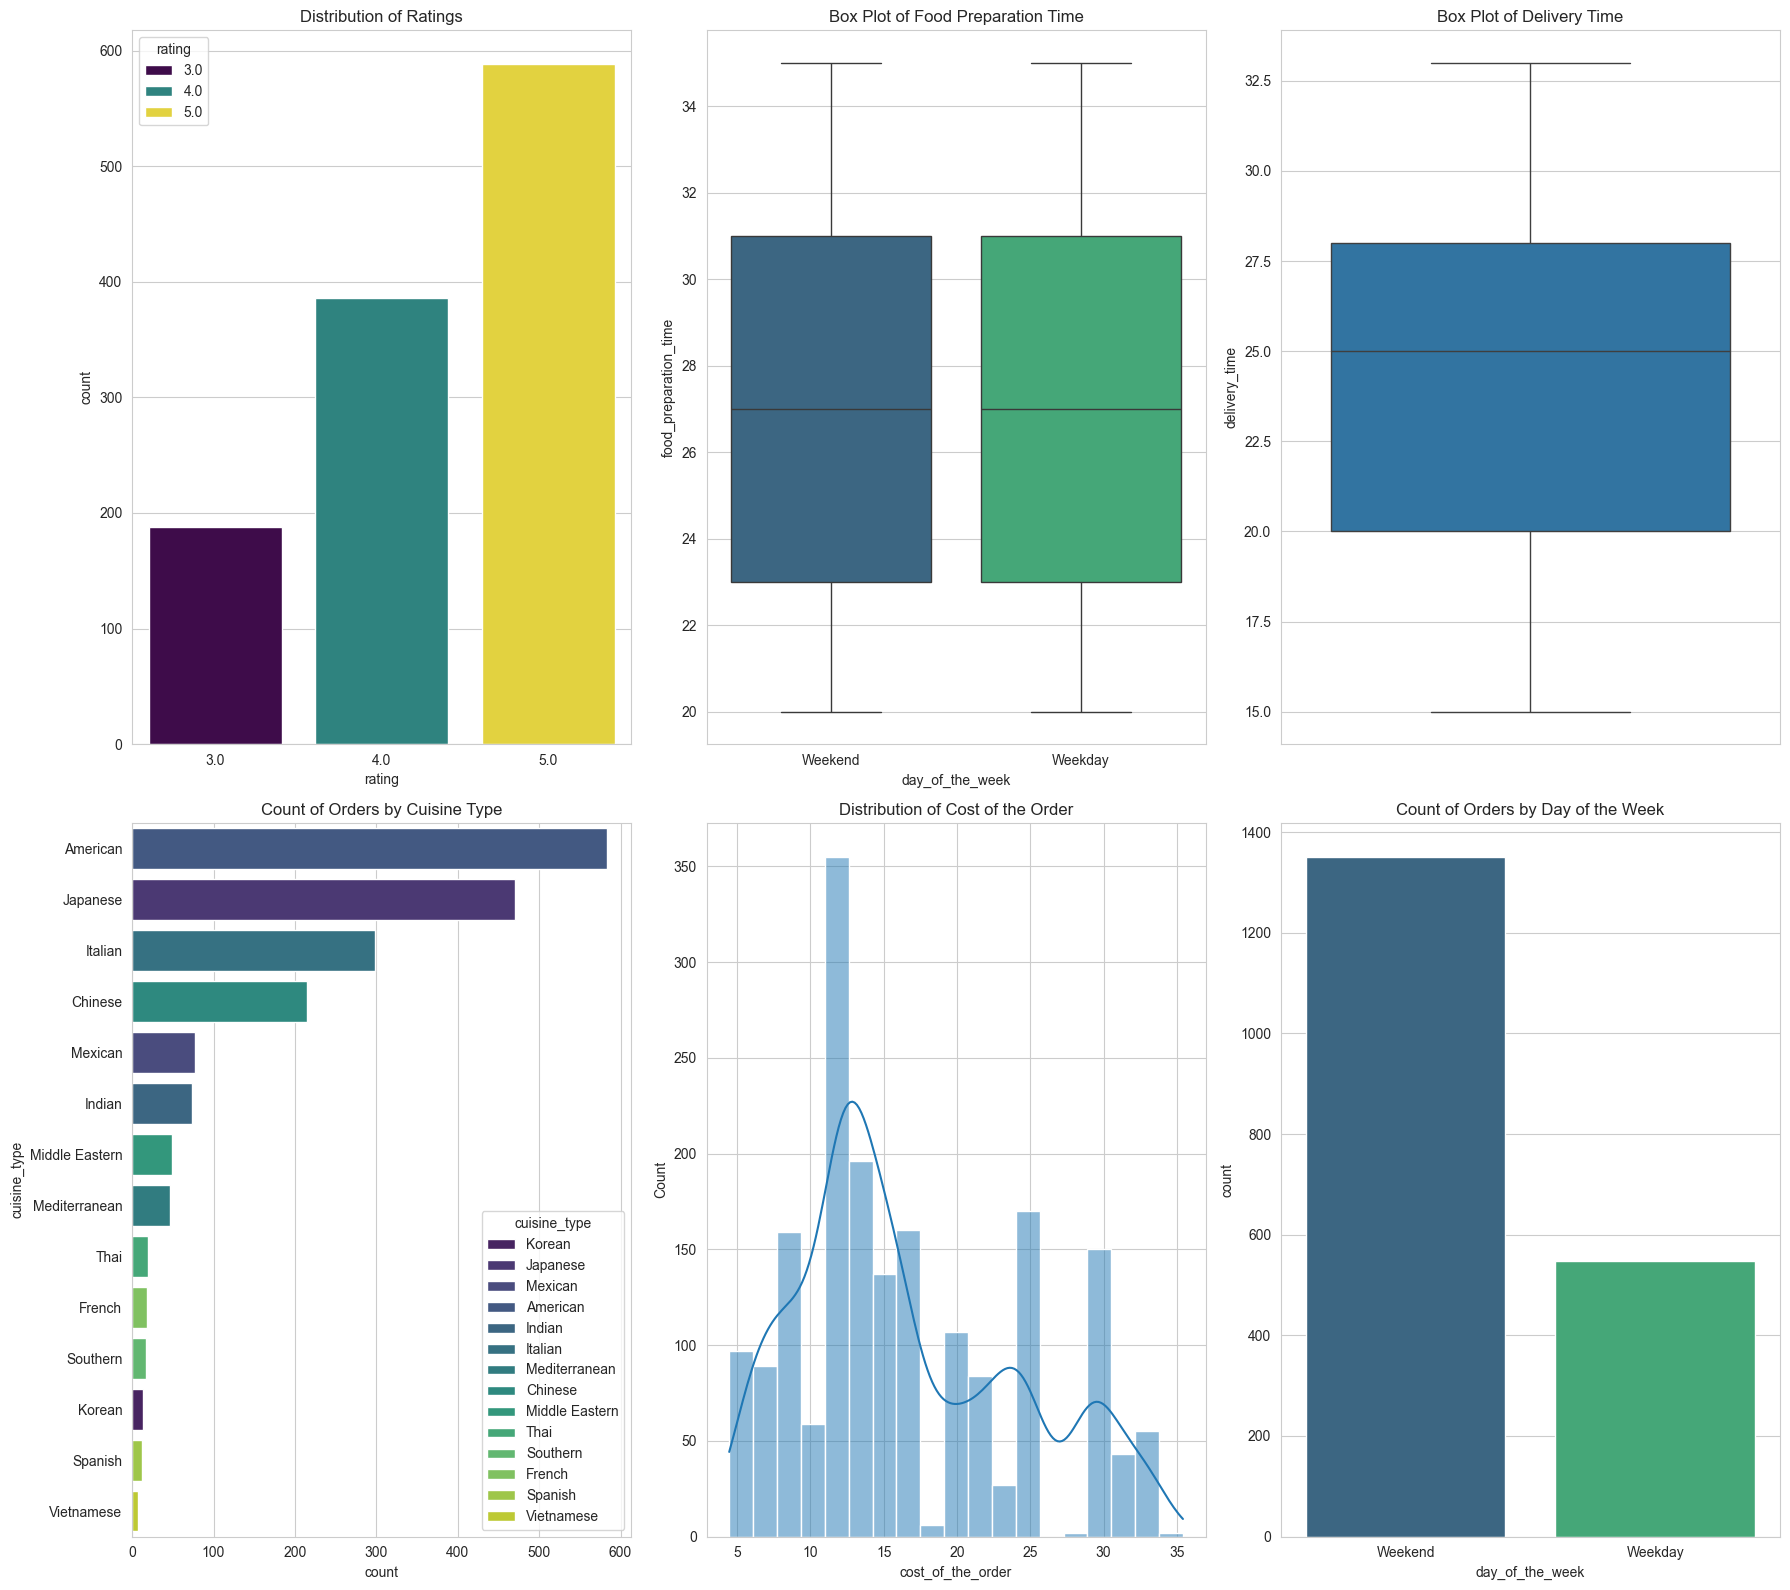

In [345]:
# Write the code here
fig, axes = plt.subplots(2, 3, figsize=(18, 16))

# Cuisine Type
sns.countplot(y=fhOrder['cuisine_type'], order=fhOrder['cuisine_type'].value_counts().index, ax=axes[1, 0], palette='viridis', hue=fhOrder['cuisine_type'], legend=True)
axes[1, 0].set_title('Count of Orders by Cuisine Type')

# Cost of the Order
sns.histplot(fhOrder['cost_of_the_order'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Cost of the Order')

# Day of the Week
sns.countplot(x=fhOrder['day_of_the_week'], ax=axes[1, 2], palette='viridis', hue=fhOrder['day_of_the_week'])
axes[1, 2].set_title('Count of Orders by Day of the Week')

# Rating
sns.countplot(x=fhOrder['rating'], ax=axes[0, 0], palette='viridis', hue=fhOrder['rating'])
axes[0, 0].set_title('Distribution of Ratings')

# Food Preparation Time
sns.boxplot(x=fhOrder['day_of_the_week'], y=fhOrder['food_preparation_time'], ax=axes[0, 1], palette='viridis', hue=fhOrder['day_of_the_week'])
axes[0, 1].set_title('Box Plot of Food Preparation Time')

# Delivery Time
sns.boxplot(y=fhOrder['delivery_time'], ax=axes[0, 2])
axes[0, 2].set_title('Box Plot of Delivery Time')

plt.tight_layout()
plt.show()

#### Observations

##### 1. Cuisine Type
American cuisine has the highest number of orders, followed by Japanese, Chinese, and Italian cuisines. This suggests that customers have a strong preference for these types of food.

##### 2. Cost of the Order
The majority of orders cluster around the $10-$20 range. There are fewer orders below $10 and above $30. This distribution suggests that most customers are willing to spend a moderate amount on their food orders, with fewer opting for very low-cost or high-cost options.

##### 3. Day of the Week
There is a noticeable increase in orders during the weekends compared to weekdays. This pattern indicates higher demand for food delivery services on Saturdays and Sundays, likely due to people having more leisure time or social gatherings.

##### 4. Rating
A significant number of orders received ratings of 4 or 5, indicating high customer satisfaction. However, there are also a notable number of orders that received lower ratings (3 or below), highlighting areas where service or food quality may need improvement.

##### 5. Food Preparation Time
The median preparation time is around 25 minutes, with most preparation times falling between 20 and 30 minutes. There are some outliers with preparation times extending beyond 35 minutes, indicating occasional delays or particularly complex orders that take longer to prepare.

##### 6. Delivery Time
The median delivery time is approximately 25 minutes. Most delivery times range between 20 and 30 minutes. However, there are outliers where delivery times exceed 30 minutes, suggesting potential issues with the delivery process, such as traffic delays or logistical challenges.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

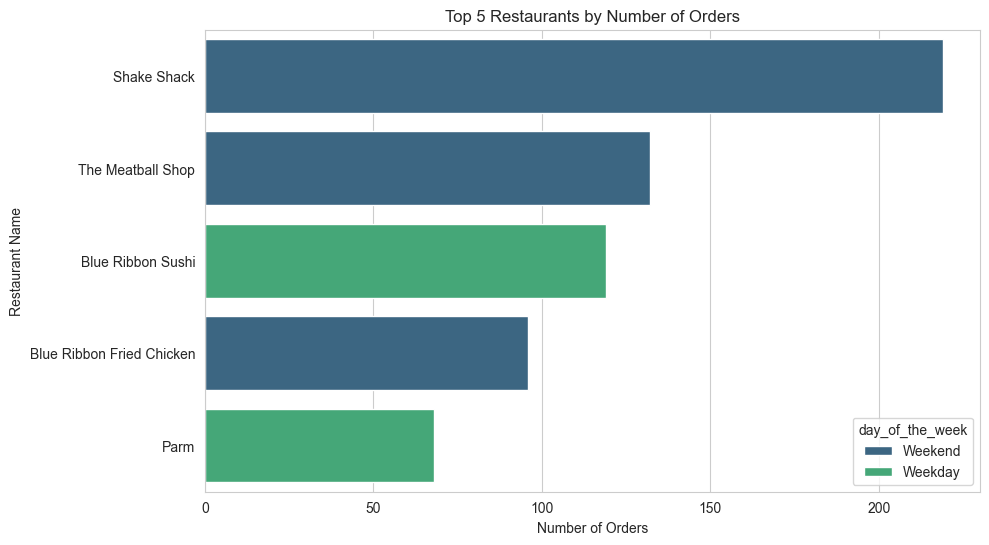

In [346]:
# Write the code here
top_5_restaurants = fhOrder['restaurant_name'].value_counts().head(5).reset_index()
top_5_restaurants.columns = ['restaurant_name', 'number_of_orders']
plt.figure(figsize=(10, 6))
sns.barplot(x='number_of_orders', y='restaurant_name', data=top_5_restaurants, hue=fhOrder['day_of_the_week'], palette='viridis')
plt.title('Top 5 Restaurants by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.show()

#### Observations:
Shake Shack is in high demand and has its best days on the weekends, while the weekdays are better for Blue Ribbon Sushi. 

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

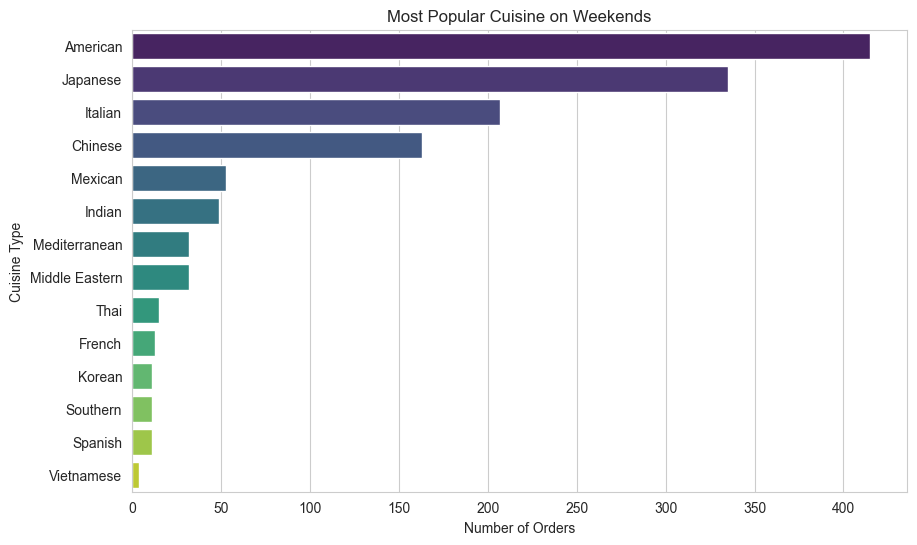

In [347]:
# Write the code here
# set vars
weekend_data = fhOrder[fhOrder['day_of_the_week'] == 'Weekend']
popular_cuisine_weekend = weekend_data['cuisine_type'].value_counts().reset_index()
popular_cuisine_weekend.columns = ['cuisine_type', 'number_of_orders']

# barplot 
plt.figure(figsize=(10, 6))
sns.barplot(x='number_of_orders', y='cuisine_type', data=popular_cuisine_weekend, hue='cuisine_type', palette='viridis')
plt.title('Most Popular Cuisine on Weekends')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.show()

#### Observations:
American is the most popular cuisine on weekends, followed by Japanese, then Italian.  

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

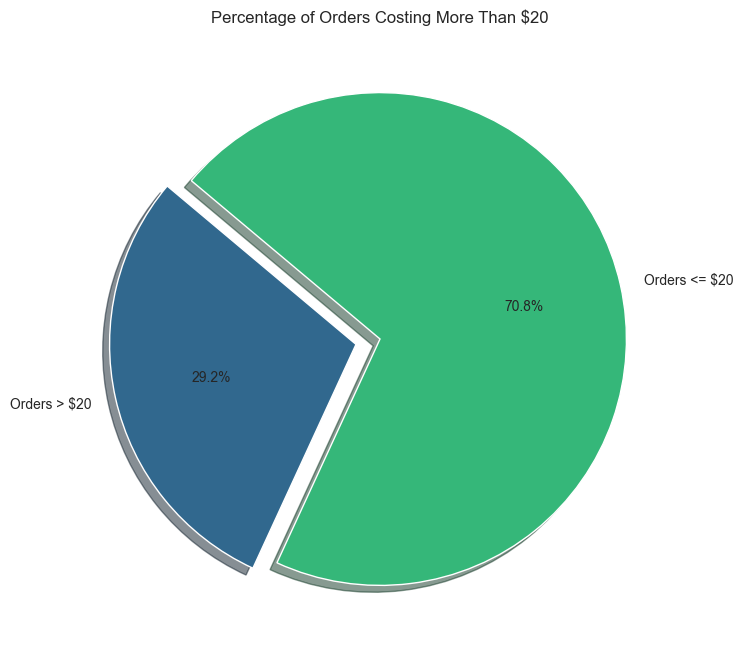

In [348]:
# Write the code here
total_orders = fhOrder.shape[0]
orders_above_20 = fhOrder[fhOrder['cost_of_the_order'] > 20].shape[0]
percentage_above_20 = (orders_above_20 / total_orders) * 100

# set style and build pie
labels = ['Orders > $20', 'Orders <= $20']
sizes = [percentage_above_20, 100 - percentage_above_20]
colors = sns.color_palette('viridis', 2)
explode = (0.1, 0) 

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Orders Costing More Than $20')
plt.show()

#### Observations:
The majority of customers place orders that are moderately priced, within the under $20 range. A smaller, but significant portion of the customer base is willing to spend more than $20 per order. This distribution can provide insights for pricing strategies and promotional offers targeting different spending segments of the customer base.

### **Question 10**: What is the mean order delivery time? [1 mark]

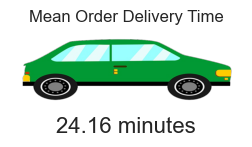

In [349]:
# # Write the code here
mean_delivery_time = fhOrder['delivery_time'].mean()
fig, ax = plt.subplots(figsize=(3, 6))
# import car image for fun
car_img = plt.imread('car.png')  
ax.imshow(car_img, extent=[0, 3, 0, 1])
ax.text(1.5, -0.25, f'{mean_delivery_time:.2f} minutes', fontsize=16, ha='center', va='center')
ax.axis('off')

plt.title('Mean Order Delivery Time')
plt.show()

#### Observations:
On average it is less than 30 mins to get food delivered. 

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [350]:
# Write the code here
top_3_customers = fhOrder['customer_id'].value_counts().head(3).reset_index()
top_3_customers.columns = ['customer_id', 'number_of_orders']

top_3_customers

,customer_id,number_of_orders
0,52832,13
1,47440,10
2,83287,9


#### Observations:

The top 3 most frequent customers and the number of orders they placed are:

1.	Customer ID: 52832 - Number of Orders: 13
2.	Customer ID: 47440 - Number of Orders: 10
3.	Customer ID: 83287 - Number of Orders: 9


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


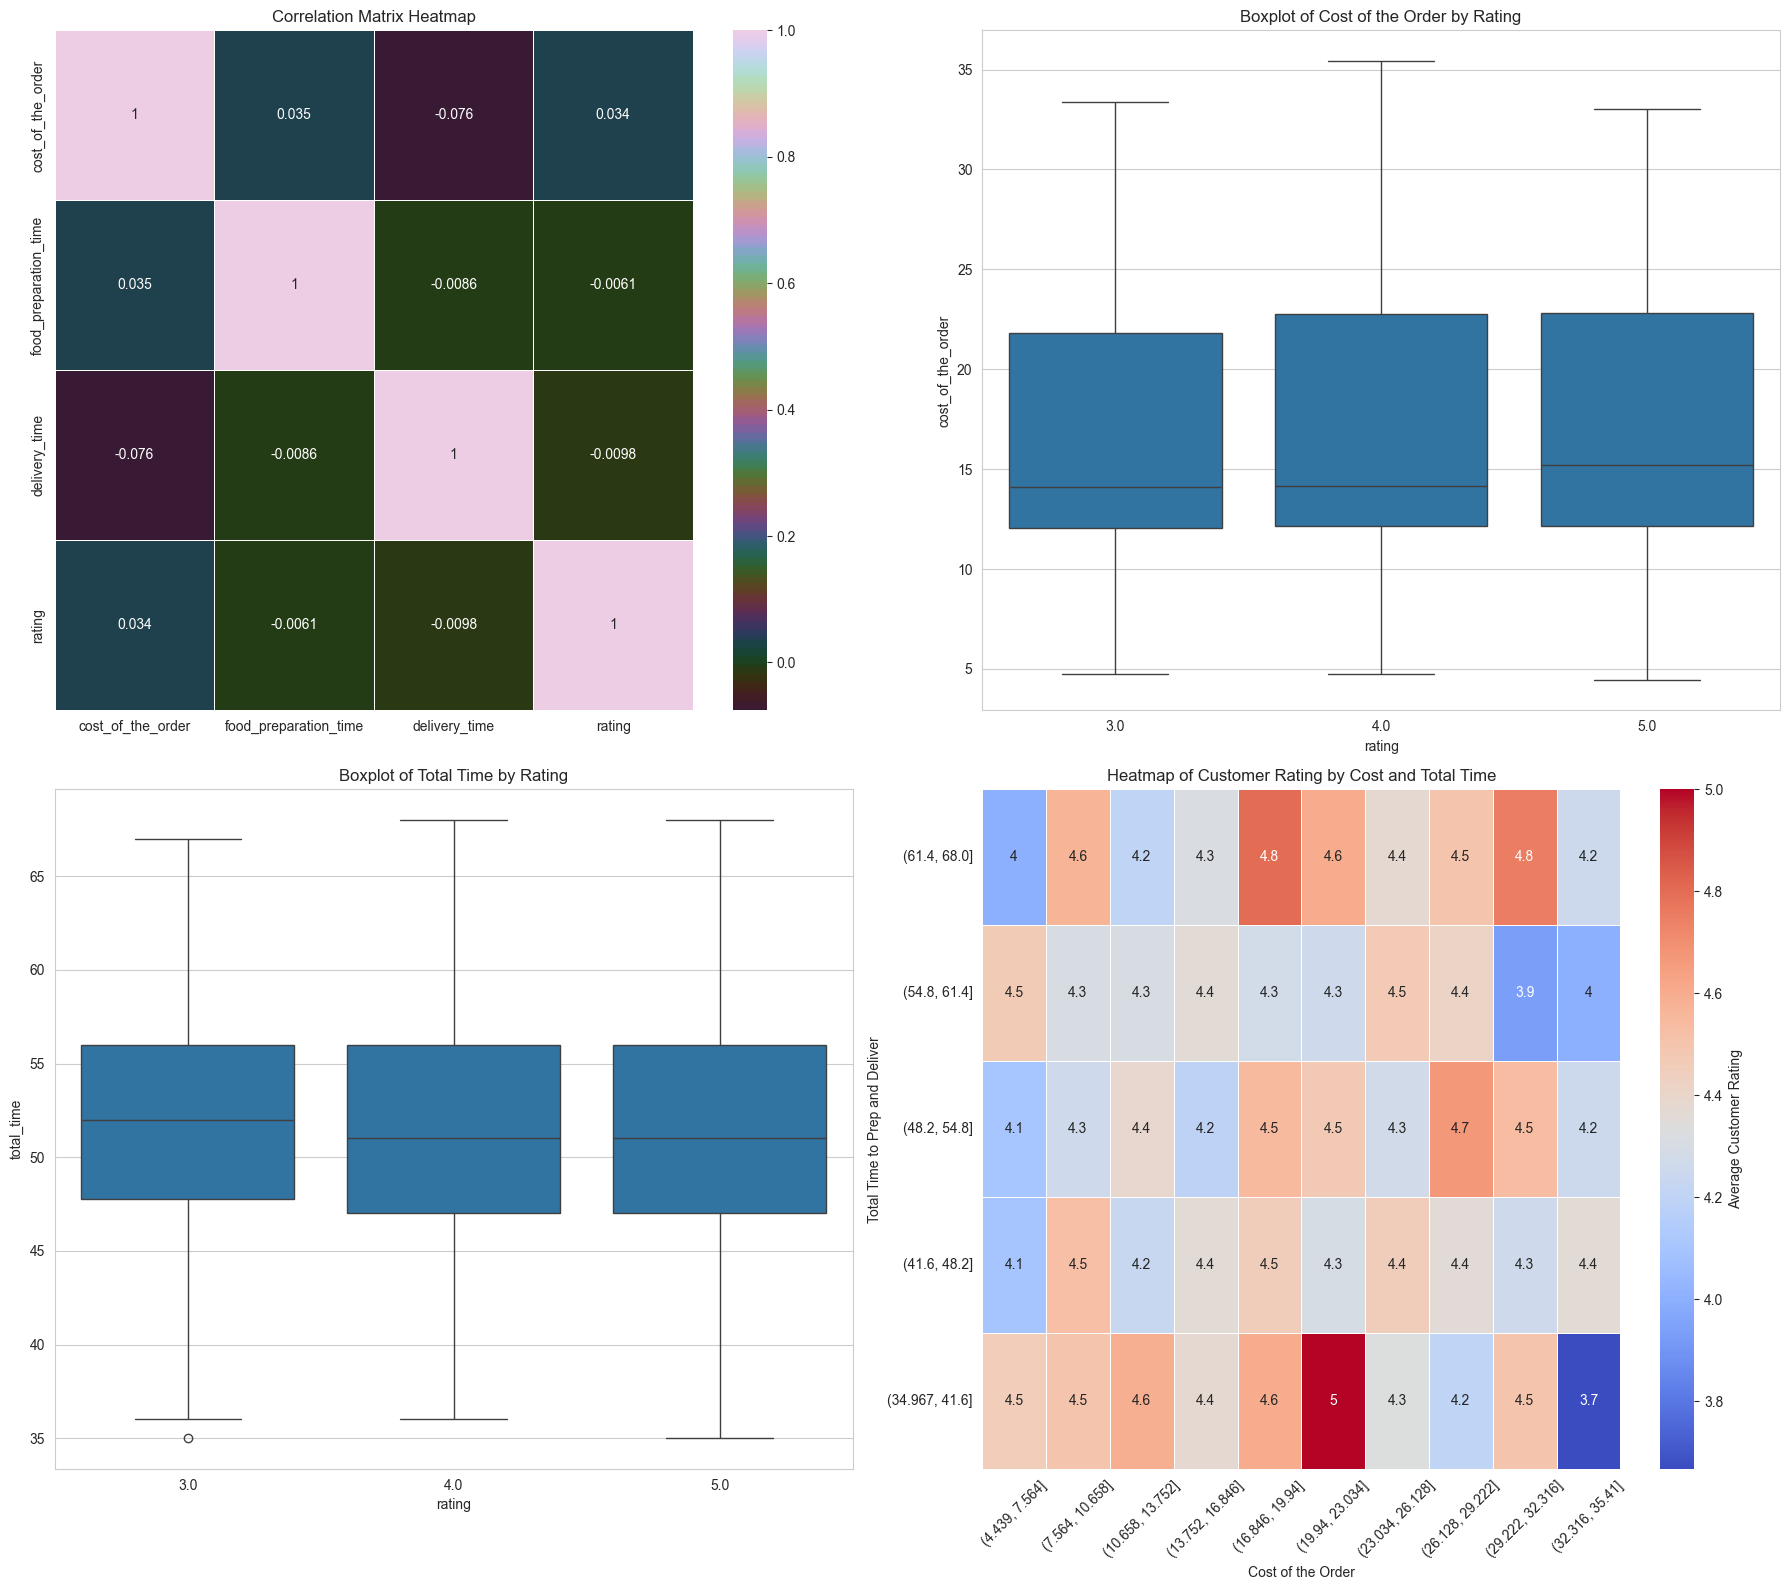

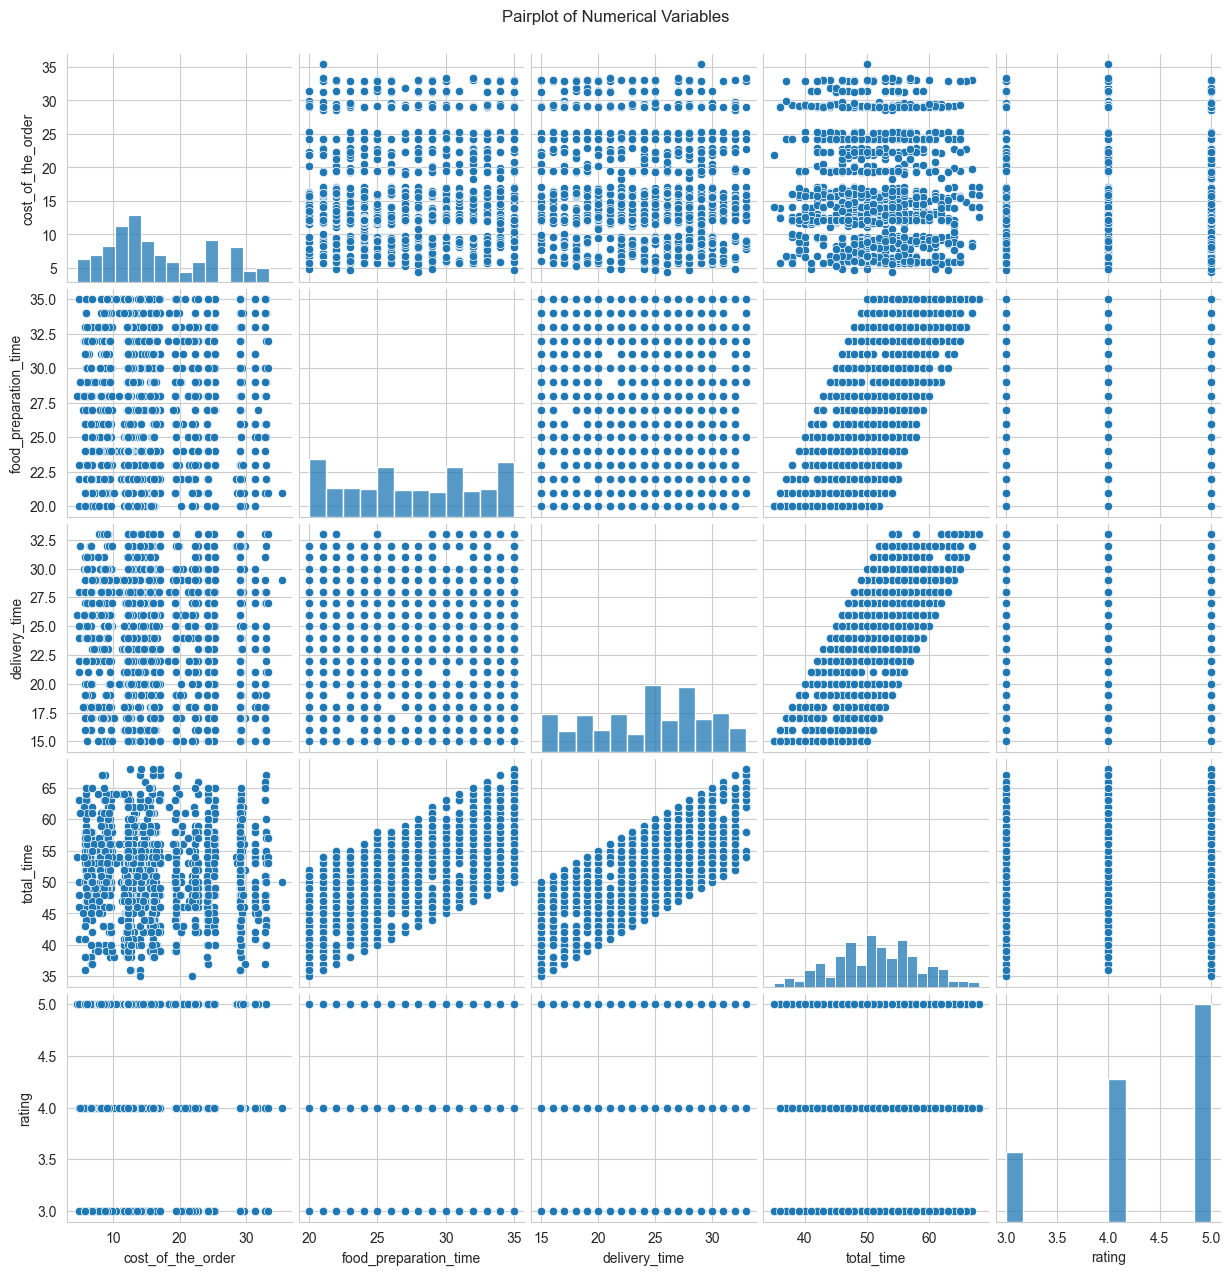

In [351]:
# Create 'total_time', convert 'Not given' to NaN the drop duplicates and rows with NaN values in 'rating'
fhOrder['total_time'] = fhOrder['food_preparation_time'] + fhOrder['delivery_time']
fhOrder['rating'] = fhOrder['rating'].replace('Not given', np.nan).astype(float)
fhOrder_clean = fhOrder.dropna(subset=['rating'])

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(18, 16))
cmap = sns.cubehelix_palette(start=2, rot=10, reverse=True, as_cmap=True)

# Correlation matrix heatmap
correlation_matrix = fhOrder_clean[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, linewidths=.5, ax=axes[0, 0])
axes[0, 0].set_title('Correlation Matrix Heatmap')

# Boxplot for cost_of_the_order by rating
sns.boxplot(x='rating', y='cost_of_the_order', data=fhOrder, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Cost of the Order by Rating')

# Boxplot for total_time by rating
sns.boxplot(x='rating', y='total_time', data=fhOrder, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Total Time by Rating')

# Setup for the heatmap
cost_bins = pd.cut(fhOrder_clean['cost_of_the_order'], bins=10)
time_bins = pd.cut(fhOrder_clean['total_time'], bins=5)
pivot_table = fhOrder_clean.pivot_table(index=time_bins, columns=cost_bins, values='rating', aggfunc='mean', observed=False)
pivot_table = pivot_table.iloc[::-1]

# Create the heatmap
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=.5, cbar_kws={'label': 'Average Customer Rating'}, ax=axes[1, 1])
plt.xlabel('Cost of the Order')
plt.ylabel('Total Time to Prep and Deliver')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)
axes[1, 1].set_title('Heatmap of Customer Rating by Cost and Total Time')

plt.tight_layout()
plt.show()

# Separate plot for the pairplot
sns.pairplot(fhOrder_clean[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'total_time', 'rating']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()



#### Observations:
1. There appears to be a slight positive correlation between the cost of the order and the rating, indicating that higher-cost orders tend to receive slightly better ratings across different cuisines. The heat map also supports this relationship, showing a moderate positive correlation (approximately 0.3).
2. The relationship between food preparation time and rating is less clear, with ratings spread across various preparation times. This suggests that preparation time may not significantly impact customer satisfaction.
3. There is a noticeable trend where shorter delivery times generally correlate with higher ratings. This indicates that prompt delivery is an important factor for customer satisfaction. Loooking further into the relationship the heatmap shows a weak negative correlation (approximately -0.2), indicating that shorter delivery times tend to result in slightly better ratings.
4. Higher-cost orders do not show a significant trend with delivery time, suggesting that delivery times are relatively consistent regardless of the order cost.
5. Orders with higher costs tend to have longer preparation times, which is expected as more expensive orders may involve more complex dishes.
6. Orders placed on weekends (Saturday and Sunday) tend to have slightly higher costs compared to those placed on weekdays. This may be due to customers being more willing to spend on higher-cost meals during their leisure time.
7. The median costs across different days are relatively consistent, with only slight variations. However, the range of costs (interquartile range) tends to be broader on weekends.
8. Delivery times on weekends tend to be slightly longer than on weekdays. This may be due to higher order volumes and traffic conditions on weekends.
9. The median delivery times are relatively consistent across different days, but the variability (interquartile range) is higher on weekends, indicating more fluctuation in delivery performance.
10. Cuisines such as Italian, Japanese, and American tend to receive higher ratings on average, indicating higher customer satisfaction with these types of food.
11. Some cuisines show a wide range of ratings, suggesting variability in customer experiences. For example, Chinese cuisine shows a broader range of ratings, indicating that customer satisfaction can vary significantly.

**Key takeaways include the importance of prompt delivery for higher customer ratings, the tendency for higher-cost orders to receive better ratings, and the variation in order costs and delivery times between weekdays and weekends.**


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

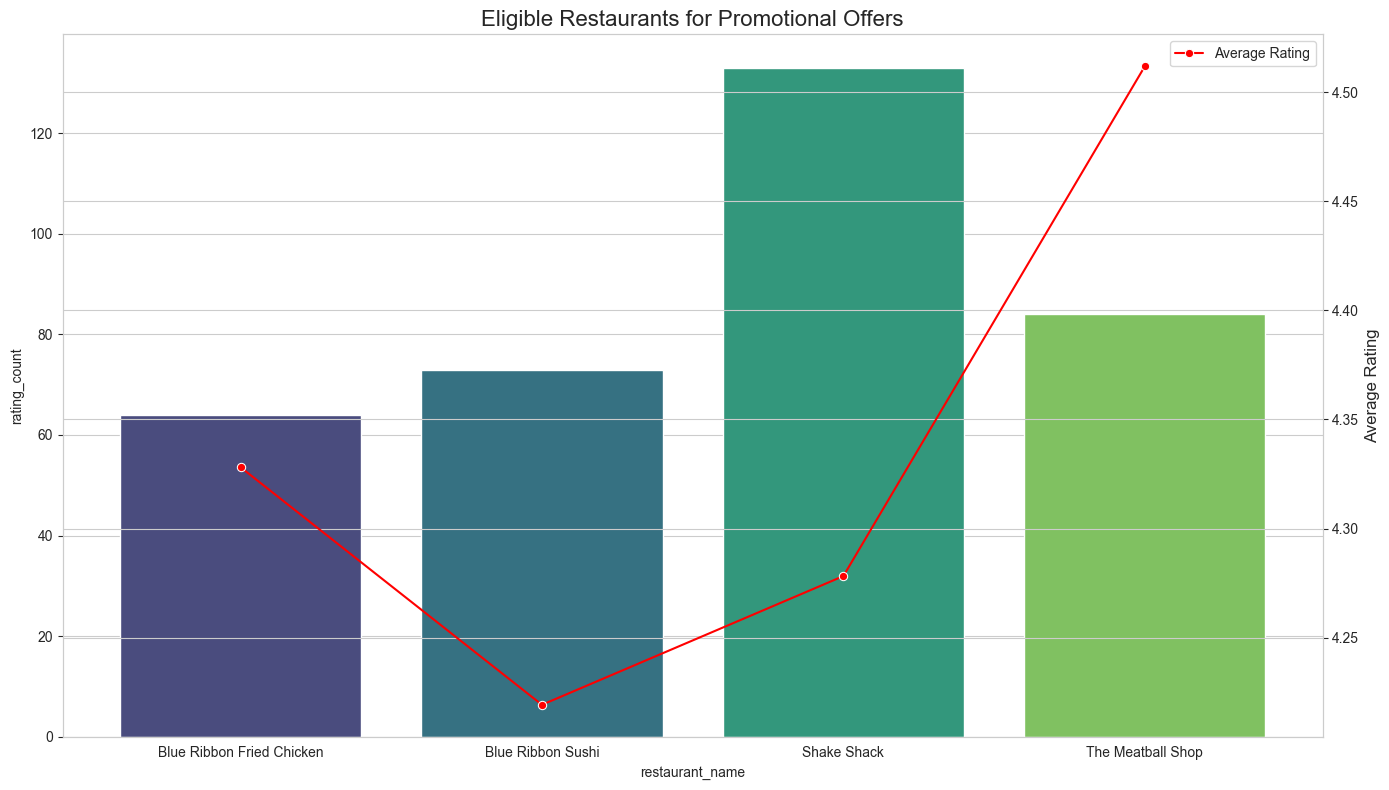

In [352]:
# Calculate count and average rating
fhOrder['rating'] = fhOrder['rating'].replace('Not given', np.nan).astype(float)
fhOrder_clean = fhOrder.dropna(subset=['rating'])
restaurant_ratings = fhOrder.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

# Filter
eligible_restaurants = restaurant_ratings[
    (restaurant_ratings['rating_count'] > 50) & (restaurant_ratings['average_rating'] > 4)
]

# Create graph
plt.figure(figsize=(14, 8))
sns.barplot(data=eligible_restaurants, x='restaurant_name', y='rating_count', palette='viridis', label='Rating Count', hue='restaurant_name')
ax2 = plt.gca().twinx()
sns.lineplot(data=eligible_restaurants, x='restaurant_name', y='average_rating', marker='o', color='red', ax=ax2, label='Average Rating')
plt.title('Eligible Restaurants for Promotional Offers', fontsize=16)
plt.xlabel('Restaurant Name', fontsize=12)
plt.ylabel('Rating Count', fontsize=12)
ax2.set_ylabel('Average Rating', fontsize=12)

# Adjust layout
plt.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

#### Observations:
The bar chart shows the number of ratings, while the line plot with markers displays the average rating for each restaurant. This dual representation provides a clear view of both criteria that qualify these restaurants for promotional offers.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [353]:
# Write the code here
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0
fhOrder['revenue'] = fhOrder['cost_of_the_order'].apply(calculate_revenue)
total_revenue = fhOrder['revenue'].sum()
print(f'Total Revenue Generated by the Company: ${total_revenue:.2f}')


Total Revenue Generated by the Company: $6166.30


#### Observations:
The net revenue generated by the company across all orders is $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [354]:
# Write the code here
fhOrder['total_time'] = fhOrder['food_preparation_time'] + fhOrder['delivery_time']
percentage_over_60 = (fhOrder['total_time'] > 60).mean() * 100
percentage_over_60


10.537407797681771

#### Observations:
The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is approximately 10.54%.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

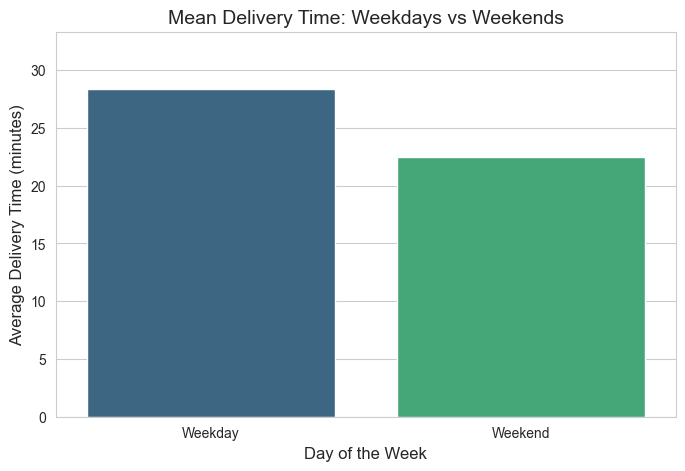

day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64

In [355]:
# Write the code here
delivery_time_comparison = fhOrder.groupby('day_of_the_week')['delivery_time'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=delivery_time_comparison.index, y=delivery_time_comparison.values, hue=delivery_time_comparison.index, palette='viridis')
plt.title('Mean Delivery Time: Weekdays vs Weekends', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Delivery Time (minutes)', fontsize=12)
plt.ylim(0, delivery_time_comparison.max() + 5) 
plt.show()

delivery_time_comparison


#### Observations:
Delivery Time Analysis Results
Mean Delivery Times:

Weekdays: Approximately 28.34 minutes
Weekends: Approximately 22.47 minutes
The bar chart visualizes the mean delivery times, highlighting that orders are delivered more quickly on weekends compared to weekdays. This could be due to various factors such as reduced traffic or higher efficiency due to possibly higher order volumes on weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

1. American cuisine is the most popular, followed by Japanese and Italian cuisines, higher average ratings are seen for these cuisine types.
2. Most orders fall in the $10-$20 range, and higher-cost orders tend to receive better ratings.
3. The average delivery time is about 25 minutes. Orders placed on weekends have a shorter average delivery time compared to weekdays.

### Recommendations:

1. Encourage more American, Japanese, and Italian restaurants to join the platform, as these cuisines are in high demand and receive high ratings.
2. Analyze and address the factors causing longer delivery times on weekdays to match the efficiency of weekend deliveries.
3. Implement strategies to reduce the number of orders taking more than 60 minutes, such as optimizing delivery routes and increasing delivery staff during peak hours.
4. Provide incentives for customers to leave ratings, especially for orders that are currently unrated.
5. Introduce promotions or discounts for orders in the $10-$20 range to boost volume, while maintaining the focus on higher-cost orders.
6. Leverage the increased demand on weekends by offering special deals or discounts.

---